In [175]:
import pandas as pd
data = pd.read_csv("H:\python\dm.csv",encoding = "latin1")

In [176]:
import numpy as np

In [177]:
data.head(5)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [178]:
data.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
Cust_Id          0
dtype: int64

In [179]:
data['History'] = data['History'].fillna('new')
#replace na values with new

In [180]:
data['History'].head(20)

0       High
1       High
2        Low
3       High
4       High
5        Low
6     Medium
7       High
8        Low
9        new
10       new
11      High
12    Medium
13      High
14      High
15       new
16      High
17      High
18       Low
19       Low
Name: History, dtype: object

In [181]:
data = pd.get_dummies(data)
data.head(5)

,Salary,Children,Catalogs,AmountSpent,Cust_Id,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium,History_new
0,47500,0,6,755,247,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0
1,63600,0,6,1318,127,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0
2,13500,0,18,296,479,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0
3,85600,1,18,2436,475,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0
4,68400,0,12,1304,151,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0


In [182]:
data = data.drop(['Cust_Id','Age_Old','Gender_Female','OwnHome_Rent',
                 'Married_Single','Location_Far','History_High'],axis=1)

In [183]:
data.head(5)

,Salary,Children,Catalogs,AmountSpent,Age_Middle,Age_Young,Gender_Male,OwnHome_Own,Married_Married,Location_Close,History_Low,History_Medium,History_new
0,47500,0,6,755,0,0,0,1,0,0,0,0,0
1,63600,0,6,1318,1,0,1,0,0,1,0,0,0
2,13500,0,18,296,0,1,0,0,0,1,1,0,0
3,85600,1,18,2436,1,0,1,1,1,1,0,0,0
4,68400,0,12,1304,1,0,0,1,0,1,0,0,0


In [184]:
y = data['AmountSpent']
x=data.drop('AmountSpent',axis = 1)

In [185]:
##create train and test parts of the data
import sklearn.model_selection as model_selection

In [186]:
import sklearn.tree as tree

In [187]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.2,random_state = 200)

In [188]:
x_test.shape

(200, 12)

In [189]:
x_train.shape


(800, 12)

In [190]:
clf = tree.DecisionTreeRegressor(max_depth = 3)

In [191]:
clf = clf.fit(x_train,y_train)

In [192]:
##create a graphical representation of the tree model
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
#os.chdir(dt_dir)

In [193]:
graph=tree.export_graphviz(clf,feature_names=x_train.columns,out_file=None,filled=True)

In [194]:
graph

'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\n0 [label="Salary <= 58650.0\\nmse = 895015.685\\nsamples = 800\\nvalue = 1227.126", fillcolor="#e5813970"] ;\n1 [label="Salary <= 32650.0\\nmse = 247665.232\\nsamples = 443\\nvalue = 713.756", fillcolor="#e5813932"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Salary <= 19350.0\\nmse = 47704.332\\nsamples = 211\\nvalue = 393.389", fillcolor="#e581390b"] ;\n1 -> 2 ;\n3 [label="mse = 21561.911\\nsamples = 114\\nvalue = 297.965", fillcolor="#e5813900"] ;\n2 -> 3 ;\n4 [label="mse = 55149.836\\nsamples = 97\\nvalue = 505.536", fillcolor="#e5813919"] ;\n2 -> 4 ;\n5 [label="History_Low <= 0.5\\nmse = 251285.334\\nsamples = 232\\nvalue = 1005.125", fillcolor="#e5813955"] ;\n1 -> 5 ;\n6 [label="mse = 212543.218\\nsamples = 196\\nvalue = 1114.918", fillcolor="#e5813962"] ;\n5 -> 6 ;\n7 [label="mse = 39262.453\\nsamples = 36\\nvalue = 407.361", fillcolor="#e581390d"] ;\n5 -> 7 ;\n8 [label="Catalogs 

In [195]:
graph=pydotplus.graph_from_dot_data(graph)

In [196]:
from IPython.display import Image

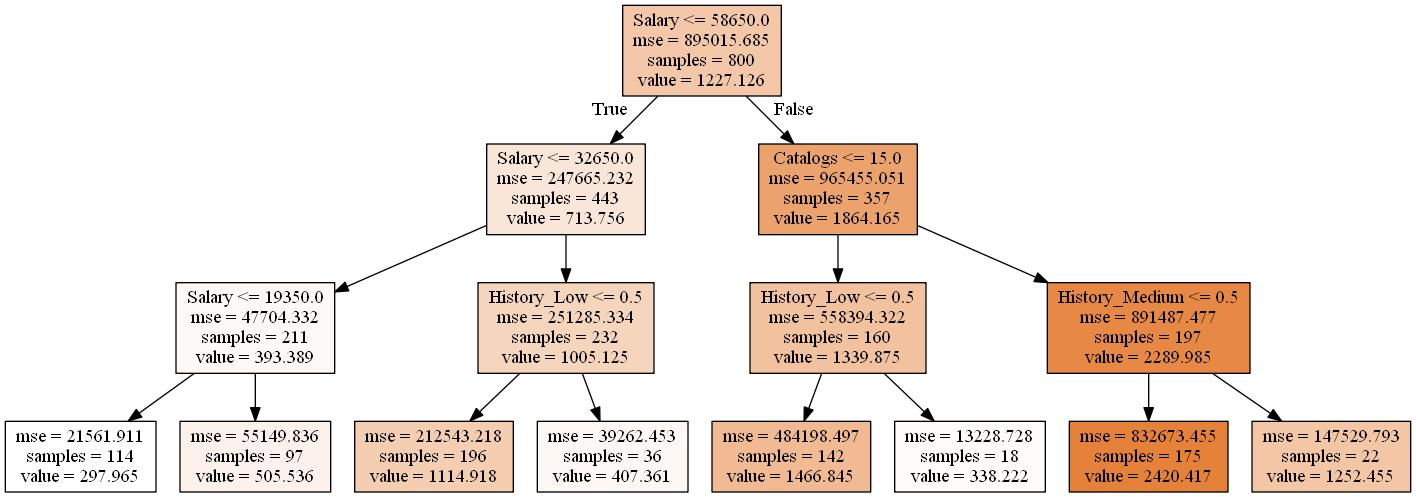

In [197]:
Image(graph.create_jpeg())

In [198]:
clf.predict(x_test)

array([1252.45454545, 2420.41714286, 1114.91836735, 1466.84507042,
       2420.41714286,  505.53608247,  407.36111111,  338.22222222,
       1114.91836735, 1114.91836735, 2420.41714286,  505.53608247,
        505.53608247, 1466.84507042,  297.96491228, 1466.84507042,
        505.53608247, 1114.91836735,  297.96491228,  505.53608247,
        505.53608247, 1252.45454545, 2420.41714286, 2420.41714286,
        505.53608247, 1466.84507042, 1114.91836735, 1466.84507042,
        297.96491228, 1114.91836735,  338.22222222,  338.22222222,
       2420.41714286, 1466.84507042,  297.96491228, 2420.41714286,
       1466.84507042, 1466.84507042, 2420.41714286, 1114.91836735,
       1114.91836735,  505.53608247, 1466.84507042, 1466.84507042,
       1114.91836735,  505.53608247,  338.22222222,  407.36111111,
       1114.91836735, 2420.41714286,  505.53608247,  505.53608247,
        505.53608247, 2420.41714286,  505.53608247, 2420.41714286,
       1114.91836735, 1114.91836735, 2420.41714286, 2420.41714

In [199]:
x_test.iloc[1]

Salary             74400
Children               0
Catalogs              18
Age_Middle             0
Age_Young              0
Gender_Male            0
OwnHome_Own            1
Married_Married        1
Location_Close         1
History_Low            0
History_Medium         0
History_new            0
Name: 233, dtype: int64

In [200]:
y_test_predicted=clf.predict(x_test)

In [210]:
clf.score(x_test,y_test)

0.5910837204427057

In [201]:
results=pd.DataFrame({'actual':y_test,'predicted':y_test_predicted})

In [202]:
results.head()

,actual,predicted
674,895,1252.454545
233,2479,2420.417143
739,716,1114.918367
865,1588,1466.845070
523,3069,2420.417143


In [203]:
#variable importance
pd.Series(clf.feature_importances_,index=x_train.columns).sort_values(ascending=False)

Salary             0.682594
Catalogs           0.178233
History_Low        0.079555
History_Medium     0.059618
History_new        0.000000
Location_Close     0.000000
Married_Married    0.000000
OwnHome_Own        0.000000
Gender_Male        0.000000
Age_Young          0.000000
Age_Middle         0.000000
Children           0.000000
dtype: float64

In [204]:
# comparing 2 models 
import sklearn.metrics as metrics
%matplotlib inline

In [205]:
metrics.r2_score(y_test,y_test_predicted)

0.5910837204427057

In [206]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))  

Mean Absolute Error: 413.53466720353447
Mean Squared Error: 421771.9310288262
Root Mean Squared Error: 649.439705460658
